In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1)

First we compute
$$\operatorname{cond}\left(\Omega ^{\circ k}\right)$$
where $\Omega$ is an $N \times (N+p)$ random matrix with i.i.d. Gaussian random entries, for a variety of oversampling parameters $p$ and powers $k$. Here we use the notation
$\left(\Omega ^{\circ k}\right)_{ij} := \Omega_{ij}^k$ .

We plot the mean and standard deviation of these condition numbers, computed empirically using many random matrices of this form.

In [2]:
N = 500
pp = [0, 5, 10, 20, 50, 100, 200]
k_max = 20
num_test = 100

kk = np.arange(1,k_max)
kappas = np.zeros((len(kk), len(pp), num_test))
for ik, k in enumerate(kk):
    for ip, p in enumerate(pp):
        for it in range(num_test):
            Omega = np.random.randn(N, N+p)
            kappa = np.linalg.cond(Omega**k)
            kappas[ik, ip, it] = kappa

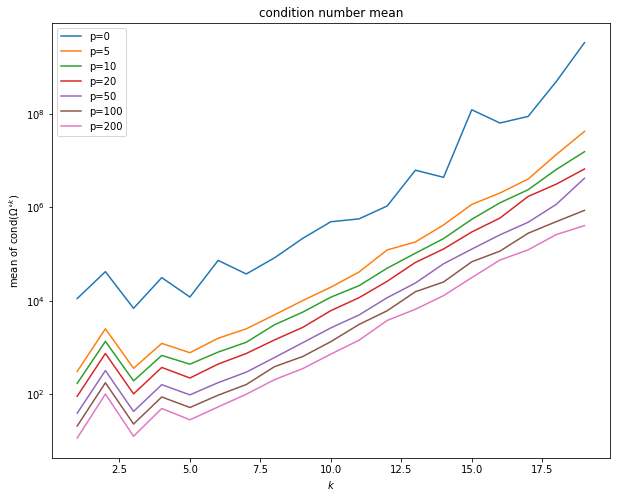

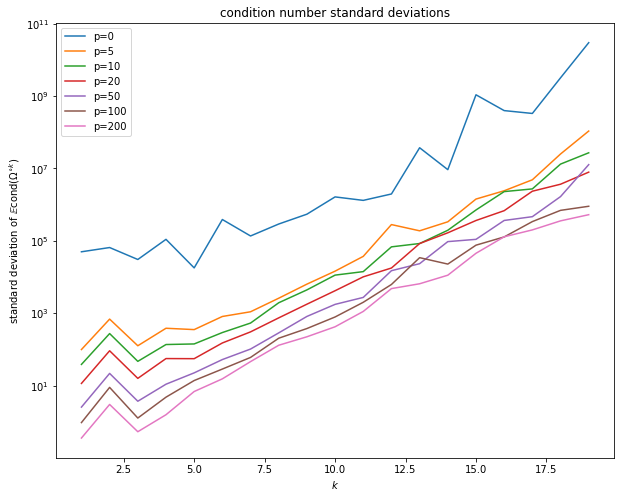

In [3]:
kappa_means = np.mean(kappas, axis=2)
kappa_stds = np.std(kappas, axis=2)

plt.figure(figsize=(10,8))
plt.semilogy(kk, kappa_means)
plt.title('condition number mean')
plt.xlabel(r'$k$')
plt.ylabel(r'mean of $\operatorname{cond}(\Omega^{\circ k})$')
plt.legend(['p=' +str(p) for p in pp])

plt.figure(figsize=(10,8))
plt.semilogy(kk, kappa_stds)
plt.title('condition number standard deviations')
plt.xlabel(r'$k$')
plt.ylabel(r'standard deviation of $\mathbb{E}\operatorname{cond}(\Omega^{\circ k})$')
plt.legend(['p=' +str(p) for p in pp])

# 2)

Next, we compute
$$\operatorname{cond}\left(\Omega_1 \circ \Omega_2 \circ \dots \circ \Omega_k\right)$$
where $\Omega$ is an $N \times (N+p)$ random matrix with i.i.d. Gaussian random entries, for a variety of oversampling parameters $p$ and powers $k$ as before. Here we use the notation
$\left(\Omega_1 \circ \Omega_2 \circ \dots \circ \Omega_k\right)_{ij} := \left(\Omega_1\right)_{ij} \left(\Omega_2\right)_{ij} \dots \left(\Omega_k\right)_{ij}$ .

We plot the mean and standard deviation of these condition numbers, computed empirically using many random matrices of this form.

In [4]:
N = 500
pp = [0, 5, 10, 20, 50, 100, 200]
k_max = 20
num_test = 100

kk = np.arange(1,k_max)
kappas = np.zeros((len(kk), len(pp), num_test))
for ik, k in enumerate(kk):
    for ip, p in enumerate(pp):
        for it in range(num_test):
            Omega = np.random.randn(N, N+p)
            for _ in range(1,k):
                Omega = Omega * np.random.randn(N, N+p)
            kappa = np.linalg.cond(Omega)
            kappas[ik, ip, it] = kappa

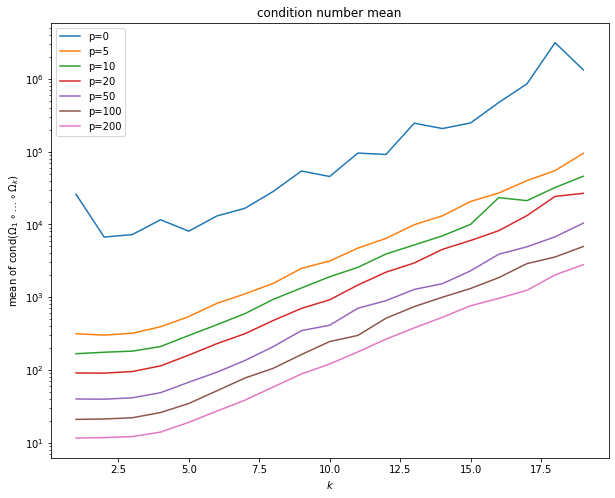

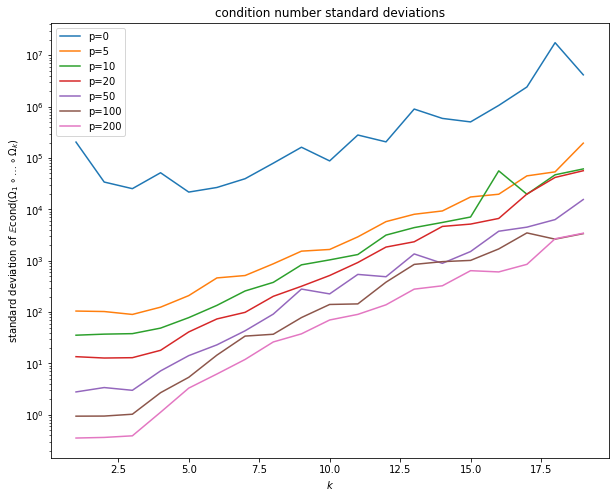

In [5]:
kappa_means = np.mean(kappas, axis=2)
kappa_stds = np.std(kappas, axis=2)

plt.figure(figsize=(10,8))
plt.semilogy(kk, kappa_means)
plt.title('condition number mean')
plt.xlabel(r'$k$')
plt.ylabel(r'mean of $\operatorname{cond}(\Omega_1 \circ \dots \circ \Omega_k)$')
plt.legend(['p=' +str(p) for p in pp])

plt.figure(figsize=(10,8))
plt.semilogy(kk, kappa_stds)
plt.title('condition number standard deviations')
plt.xlabel(r'$k$')
plt.ylabel(r'standard deviation of $\mathbb{E}\operatorname{cond}(\Omega_1 \circ \dots \circ \Omega_k)$')
plt.legend(['p=' +str(p) for p in pp])